In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv("car_price.csv")

In [3]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [5]:
df['Brand'].value_counts()

Ford          1048
Audi          1038
Volkswagen    1020
Honda         1009
Chevrolet     1003
BMW            999
Hyundai        995
Kia            976
Toyota         970
Mercedes       942
Name: Brand, dtype: int64

In [6]:
X = df[['Year', 'Mileage', 'Engine_Size', 'Owner_Count']]  # Features
y = df['Price']  # Target Variable


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [10]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')


Mean Squared Error: 1137488.1830359015
R2 Score: 0.8761959646360744


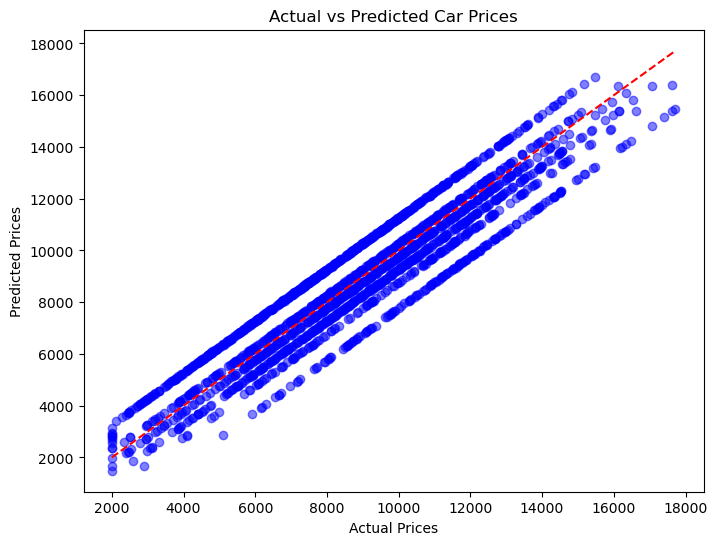

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_scaled, y, cv=5, scoring='r2')
print(f'Cross-Validation R2 Scores: {scores}')
print(f'Mean R2 Score: {np.mean(scores)}')


Cross-Validation R2 Scores: [0.87397932 0.87464757 0.8735202  0.8683929  0.88801047]
Mean R2 Score: 0.8757100900510444


In [14]:
new_data = pd.DataFrame({'Year': [2023], 'Mileage': [15000], 'Engine_Size': [2.0], 'Owner_Count': [1]})
new_price = model.predict(new_data)
print(f'Predicted Car Price: ${new_price[0]:.2f}')


Predicted Car Price: $13945.17


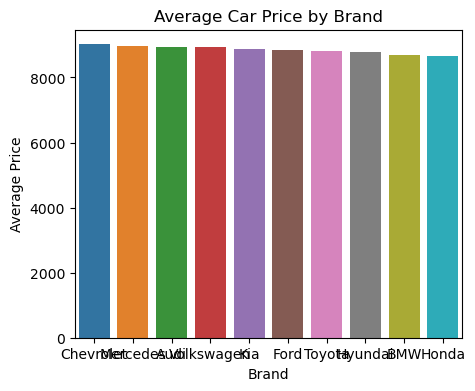

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,4))
brand_price = df.groupby('Brand')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=brand_price.index, y=brand_price.values)
plt.title('Average Car Price by Brand')
plt.ylabel('Average Price')
plt.show()

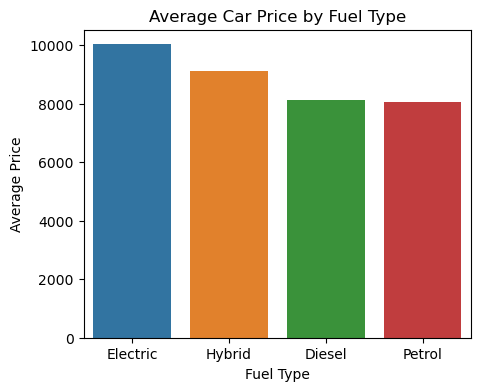

In [16]:
plt.figure(figsize=(5,4))
fuel_price = df.groupby('Fuel_Type')['Price'].mean().sort_values(ascending=False)
sns.barplot(x=fuel_price.index, y=fuel_price.values)
plt.title('Average Car Price by Fuel Type')
plt.ylabel('Average Price')
plt.xlabel('Fuel Type')
plt.show()

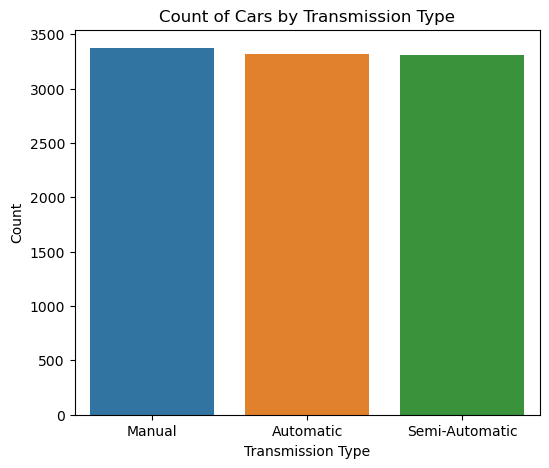

In [17]:
plt.figure(figsize=(6, 5))
sns.countplot(x='Transmission', data=df)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Count')
plt.show()

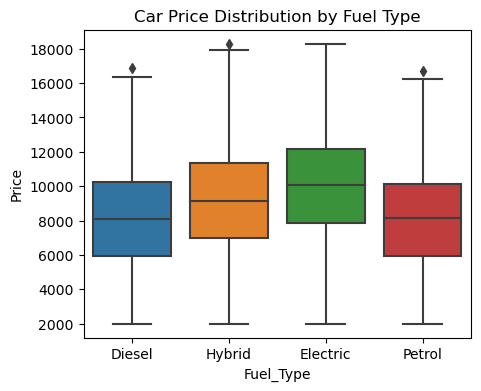

In [18]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Fuel_Type', y='Price', data=df)
plt.title('Car Price Distribution by Fuel Type')
plt.show()


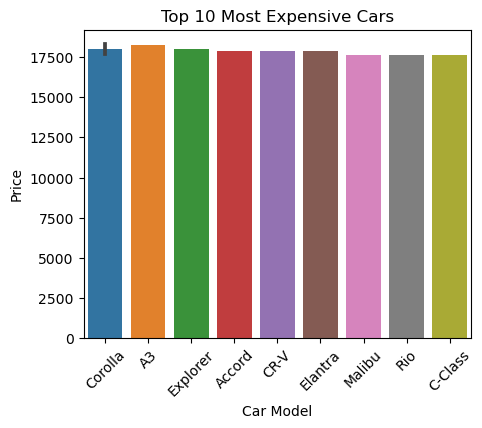

In [19]:
top_cars = df.sort_values(by='Price', ascending=False).head(10)

plt.figure(figsize=(5,4))
sns.barplot(x=top_cars['Model'], y=top_cars['Price'])
plt.title('Top 10 Most Expensive Cars')
plt.xticks(rotation=45)
plt.xlabel('Car Model')
plt.ylabel('Price')
plt.show()

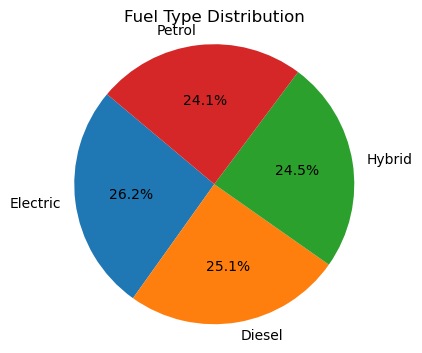

In [20]:
fuel_counts = df['Fuel_Type'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Fuel Type Distribution')
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.show()


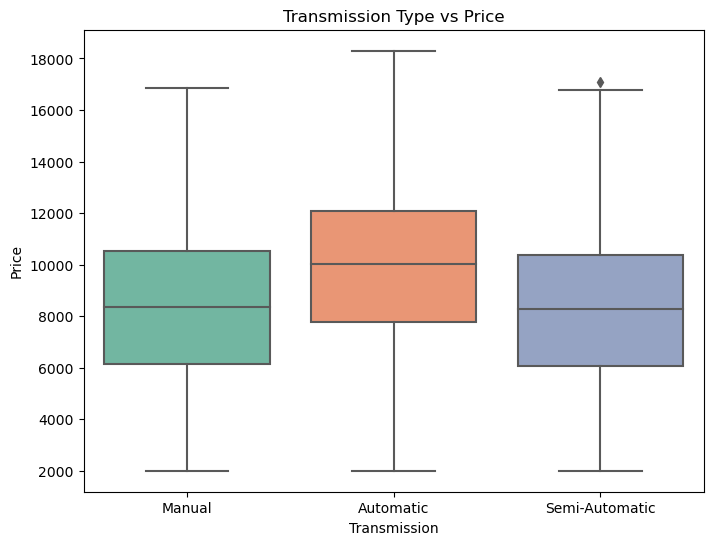

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price', data=df, palette='Set2')
plt.title('Transmission Type vs Price')
plt.show()


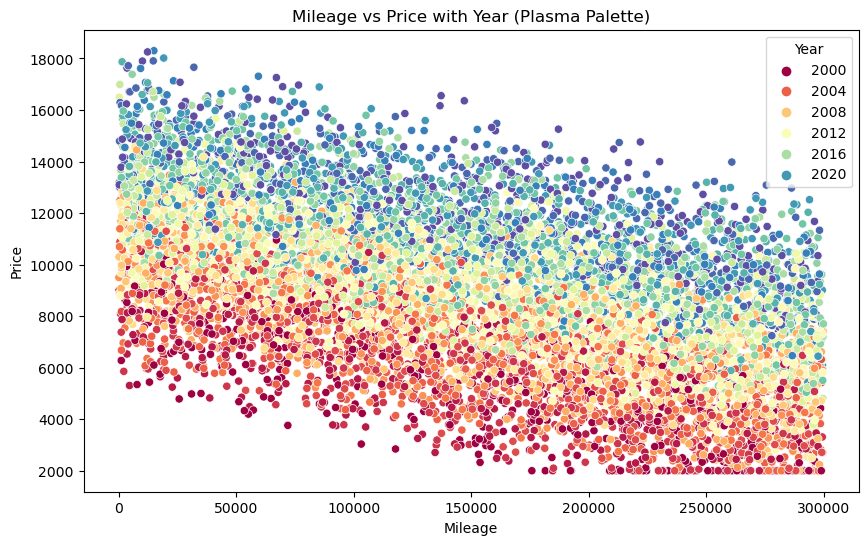

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Mileage', y='Price', hue='Year', 
                 palette='Spectral', sizes=(20, 200), data=df)
plt.title('Mileage vs Price with Year (Plasma Palette)')
plt.show()


In [23]:
a=min(df['Price'])
a

2000

In [24]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [26]:
brand=pd.get_dummies(df['Brand'],prefix="Brand")

In [27]:
model=pd.get_dummies(df['Model'],prefix="Model")

In [28]:
fuel_type=pd.get_dummies(df['Fuel_Type'],prefix="Fuel_Type")

In [29]:
transmission=pd.get_dummies(df['Transmission'],prefix="Transmission")

In [30]:
print(brand)

      Brand_Audi  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0              0          0                0           0            0   
1              0          0                1           0            0   
2              0          0                0           0            0   
3              1          0                0           0            0   
4              0          0                0           0            0   
...          ...        ...              ...         ...          ...   
9995           0          0                0           0            0   
9996           0          0                1           0            0   
9997           0          1                0           0            0   
9998           0          0                0           1            0   
9999           0          0                0           0            0   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0                 0          1            

In [31]:
df.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [32]:
df=pd.concat([df,brand,model,fuel_type,transmission],axis=1)

In [33]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [34]:
reg.coef_

array([ 2.98601356e+02,  9.92739310e+02, -1.98902435e-02, -5.50438441e-01,
        3.58753368e-02, -4.75228771e+08, -3.85389627e+08, -9.59820103e+07,
       -1.55870801e+08, -1.40128767e+08, -1.01244353e+08, -2.90216842e+08,
       -5.67867044e+07, -5.36410586e+08, -6.95843073e+08,  1.18799469e+08,
        1.18799462e+08,  2.08638611e+08,  2.08638607e+08, -1.26461388e+08,
       -2.09803452e+08, -1.26461389e+08,  2.69820423e+08, -1.26461381e+08,
        2.69820426e+08, -2.09803455e+08, -1.65345809e+08, -1.70608152e+08,
       -1.10719356e+08, -1.10719358e+08, -1.10719355e+08, -2.09803445e+08,
        4.29252913e+08, -1.70608147e+08, -1.70608149e+08,  2.36266893e+07,
        4.29252914e+08,  2.08638609e+08,  2.69820434e+08,  2.36266894e+07,
       -1.65345808e+08,  2.36266899e+07,  4.29252913e+08, -1.65345805e+08,
        1.18799474e+08, -1.50860831e+08, -1.50858843e+08, -1.50859841e+08,
       -1.50860830e+08, -4.01917189e+08, -4.01918679e+08, -4.01918681e+08])

In [35]:
reg.intercept_

818776604.2930918

In [36]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2012,2.0,5356,2,3,12092,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
2,2020,4.2,231440,4,2,11171,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,2023,2.0,160971,2,1,11780,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,2003,2.6,286618,3,3,2867,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,2002,1.4,168000,2,1,6240,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
9997,2010,3.0,86664,5,1,9866,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
9998,2002,1.4,225772,4,1,4084,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

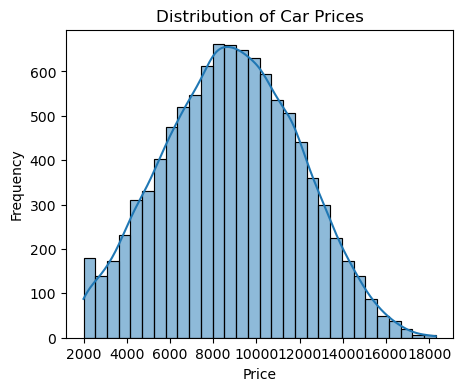

In [38]:
plt.figure(figsize=(5,4))
sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

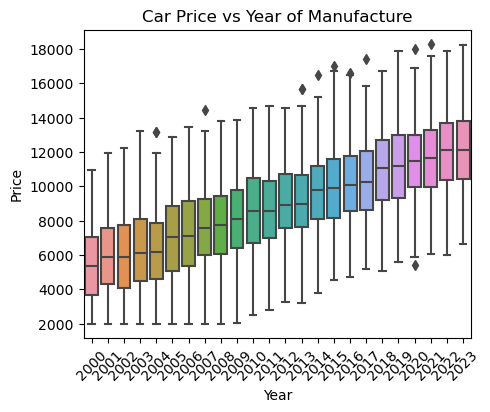

In [39]:
plt.figure(figsize=(5,4))
sns.boxplot(x='Year', y='Price', data=df)
plt.title('Car Price vs Year of Manufacture')
plt.xticks(rotation=45)
plt.show()


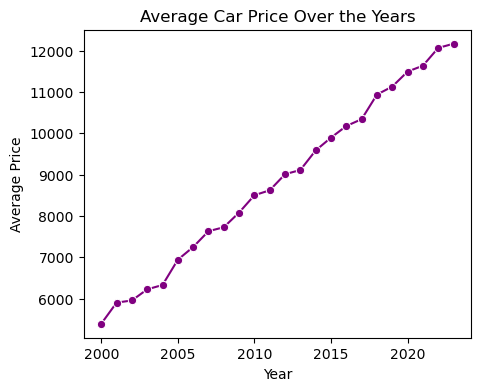

In [40]:
plt.figure(figsize=(5,4))
avg_price_year = df.groupby('Year')['Price'].mean()
sns.lineplot(x=avg_price_year.index, y=avg_price_year.values, marker='o',color='purple')
plt.title('Average Car Price Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

In [41]:
print(df.corr())

                                 Year  Engine_Size   Mileage     Doors  \
Year                         1.000000    -0.001306 -0.002476  0.014867   
Engine_Size                 -0.001306     1.000000  0.015135 -0.009844   
Mileage                     -0.002476     0.015135  1.000000  0.007879   
Doors                        0.014867    -0.009844  0.007879  1.000000   
Owner_Count                  0.000116     0.007122  0.006287 -0.005431   
Price                        0.663036     0.357403 -0.551227  0.000511   
Brand_Audi                   0.013293     0.009591  0.006841 -0.006790   
Brand_BMW                   -0.020653    -0.006865  0.002861 -0.008593   
Brand_Chevrolet              0.016394    -0.001988 -0.009663  0.005221   
Brand_Ford                  -0.003493     0.013015  0.005594  0.004717   
Brand_Honda                 -0.008549    -0.021743  0.012364  0.002221   
Brand_Hyundai                0.001066    -0.018475  0.002302  0.004329   
Brand_Kia                   -0.001009 

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns


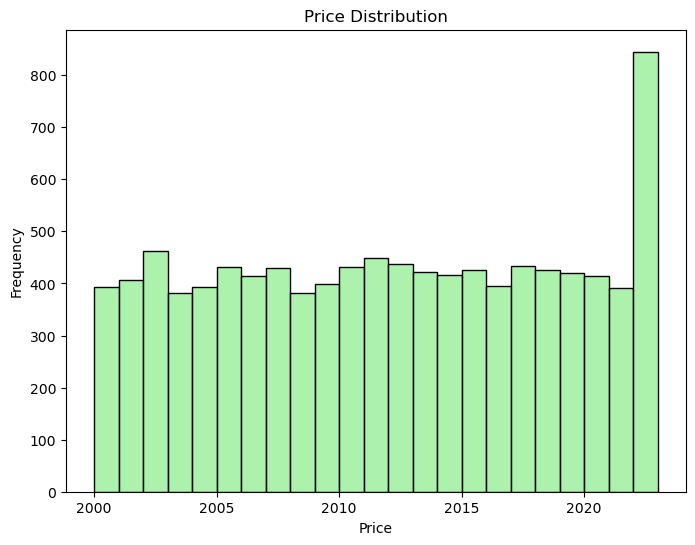

In [43]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Year'], color='lightgreen')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


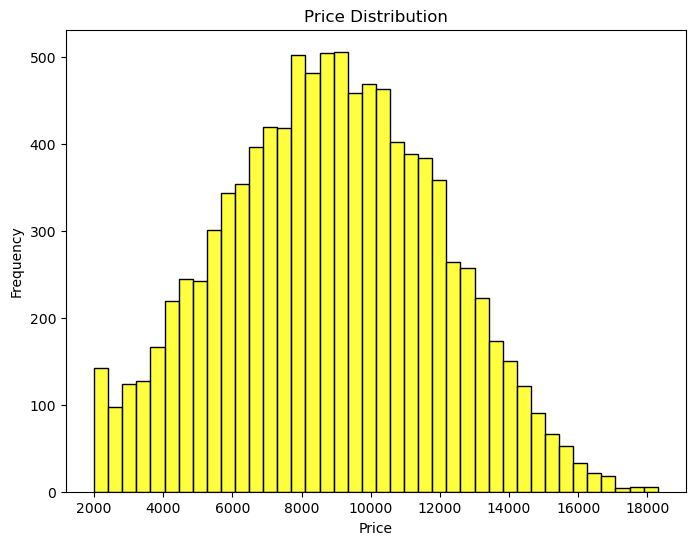

In [44]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'],color="yellow")
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
